# Setup

In [1]:
import pandas as pd
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# plt.rcParams['axes.labelsize'] = 14
# plt.rcParams['xtick.labelsize'] = 12
# plt.rcParams['ytick.labelsize'] = 12


# Loading Data....

In [2]:
data=pd.read_csv('HireArt - Data Analyst Exercise 10.12.17 - Sheet1.csv')
data.head()

,Account manager,Client Name,Date of Contact
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07
2,Milan Crona,Armstrong Group,2013-11-02
3,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25
4,Chauncey Dach,Abbott Group,2016-03-21


In [3]:
#Count the numbers of Account manager
data2=data.groupby(['Account manager'])
data2.size()

Account manager
Aidan Pouros       239
Chauncey Dach      253
Milan Crona        286
Rigoberto White    222
dtype: int64

# Split out the contacts made by Account Manager and Visualized by bar plot

##### A potential waring would pop out regarding to the column names (due to little bit confusing), but we should be ok to use that since we know what we are doing and we are getting right plots

/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Contact Frequency of Milan Crona
                 Date of Contact
Date of Contact                 
2014-10-31                    15
2013-10-31                    14
2016-10-31                    12
2016-09-30                    11
2015-10-31                    11
2014-09-30                    10

Contact Frequency of Aidan Pouros
                 Date of Contact
Date of Contact                 
2015-10-31                    17
2014-10-31                    17
2013-10-31                    15
2016-10-31                    13
2016-06-30                     9
2013-11-30                     8

Contact Frequency of Chauncey Dach
                 Date of Contact
Date of Contact                 
2013-10-31                    25
2015-10-31                    14
2014-10-31                    11
2016-10-31                    11
2015-09-30                     9
2016-09-30                     8

Contact Frequency of Rigoberto White
                 Date of Contact
Date of Contact                 


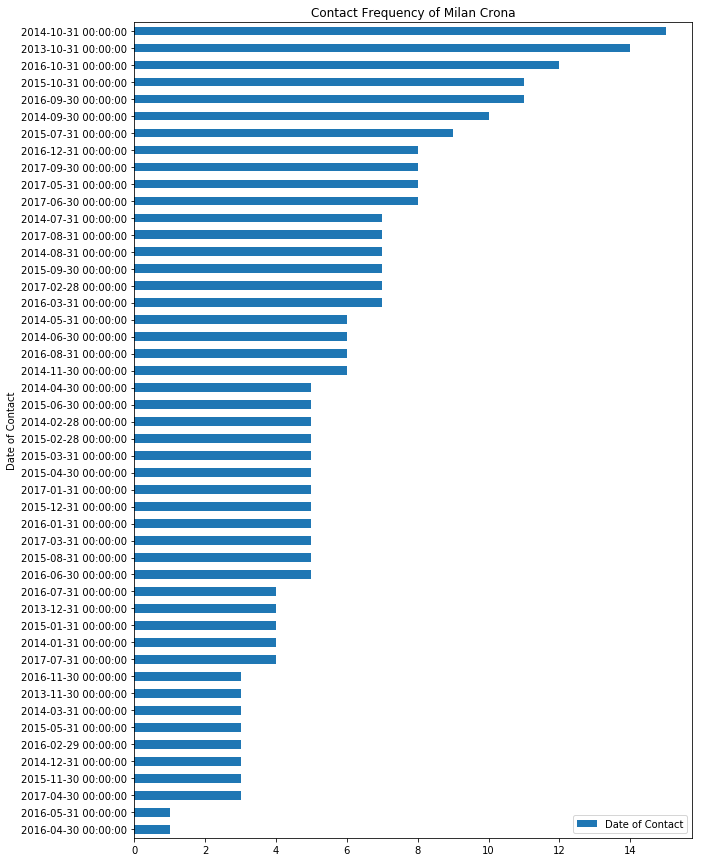

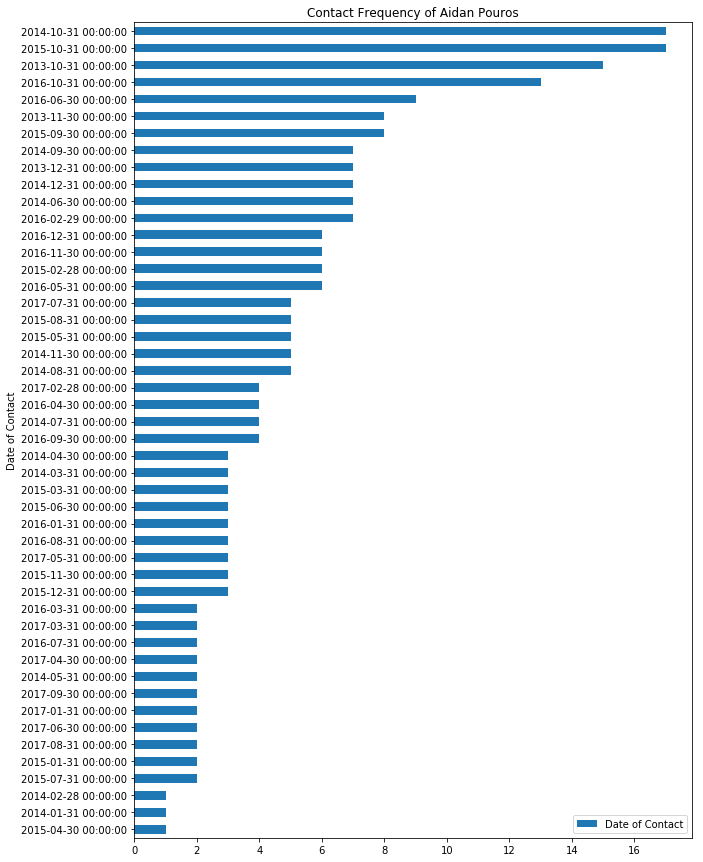

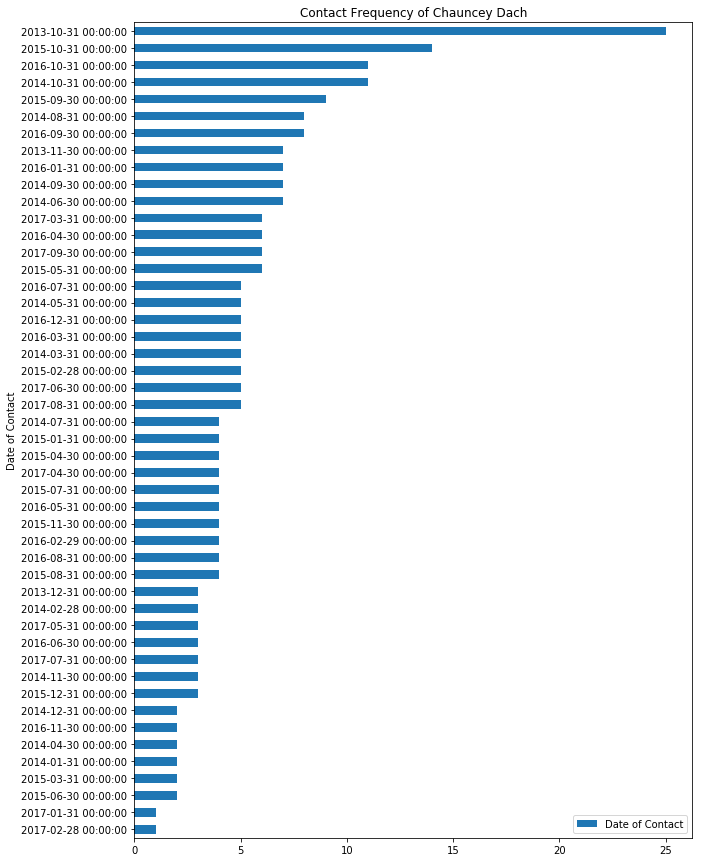

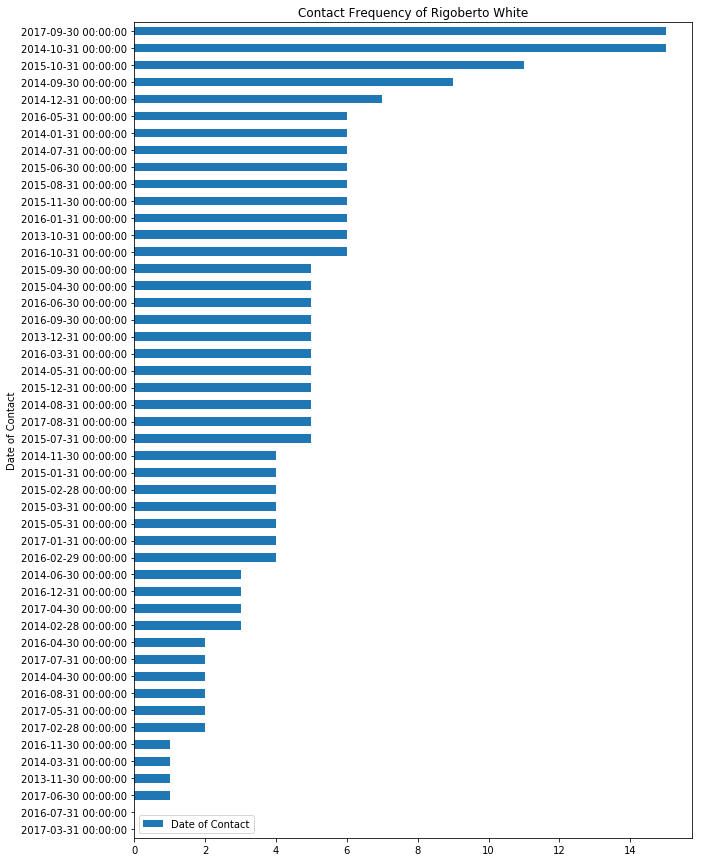

In [4]:
manager_list = data['Account manager'].unique()
def visualize_by_manager(name):
    df1 = data.groupby(['Account manager']).get_group(name)
    df1['Date of Contact'] = pd.to_datetime(df1['Date of Contact'])
    df1.index = df1['Date of Contact']
    df1.drop(["Account manager","Client Name"], axis=1, inplace = True)
    df2 = df1.resample('M').count()
    df3=df2.sort_values('Date of Contact', ascending=False)
    print('Contact Frequency of {0}'.format(name))
    print(df3.head(6))
    print()
    df4=df2.sort_values('Date of Contact', ascending=True)
    df4.plot.barh(figsize=(10,15), title='Contact Frequency of {0}'.format(name))
    
for name in manager_list:
    visualize_by_manager(name)

# Conclusion: Most of the account managers contact their clients more frequently in October and September of each year.